# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Preprocessed = pd.read_excel('F:\AppliedDataScience\Project\Output\Encod_Medain_Prob_Out.xlsx')
Preprocessed.head(100)

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,year
0,3,112,0,4,5,1,2,0,1,6,0,2,6,2
1,1,0,0,2,4,3,1,3,1,0,0,2,2,1
2,3,0,0,0,0,3,2,3,1,5,25,2,1,1
3,4,89,1,4,0,0,5,0,3,10,100,2,2,1
4,4,0,0,1,4,0,8,1,4,5,100,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,69,1,3,4,0,8,0,7,0,7,2,2,0
96,4,177,1,3,0,2,6,1,3,1,2,2,4,0
97,4,37,1,4,4,1,1,1,3,0,70,2,7,1
98,4,38,1,3,4,1,8,3,1,1,70,2,7,1


In [3]:
Preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   primary_track                2497 non-null   int64
 1   program_duration_days        2497 non-null   int64
 2   placed                       2497 non-null   int64
 3   employment_status            2497 non-null   int64
 4   highest_level_of_education   2497 non-null   int64
 5   length_of_job_search         2497 non-null   int64
 6   biggest_challenge_in_search  2497 non-null   int64
 7   professional_experience      2497 non-null   int64
 8   work_authorization_status    2497 non-null   int64
 9   number_of_interviews         2497 non-null   int64
 10  number_of_applications       2497 non-null   int64
 11  gender                       2497 non-null   int64
 12  race                         2497 non-null   int64
 13  year                         2497 non-null   int

In [4]:
Preprocessed.columns

Index(['primary_track', 'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race', 'year'],
      dtype='object')

# EDA (Exploratory Data Analysis)

Let's create some simple plots to check out the data!

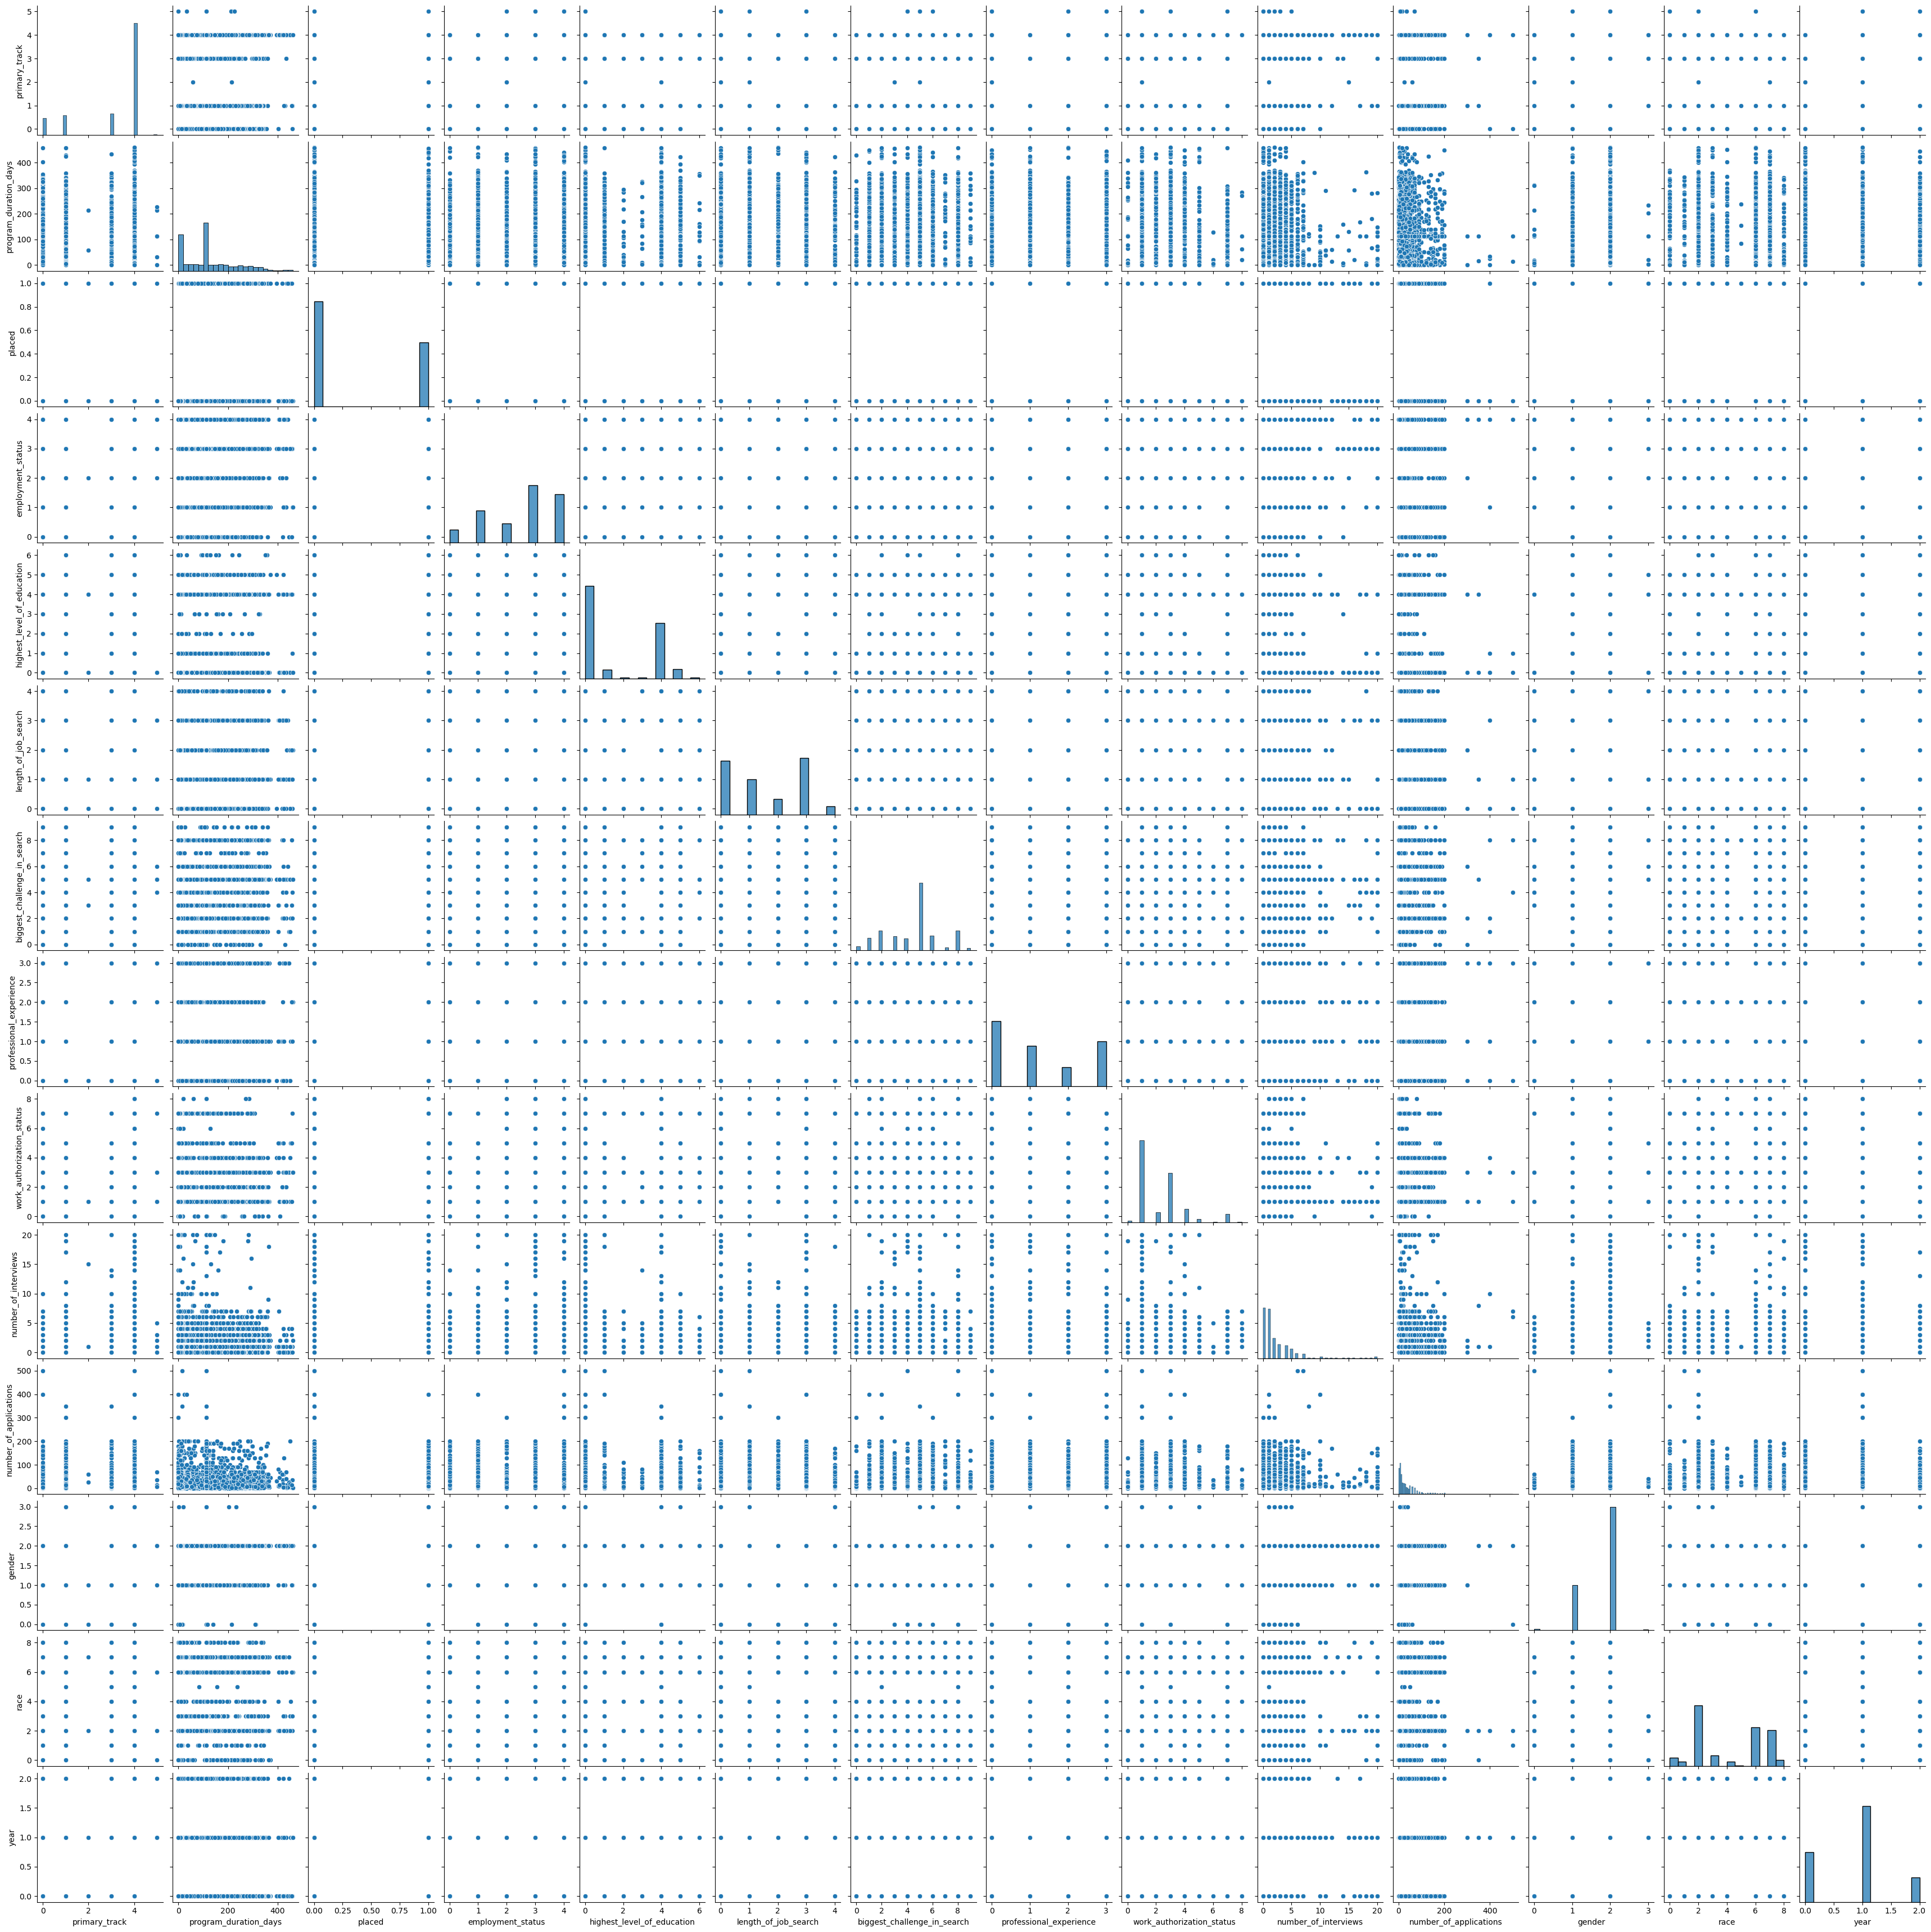

In [5]:
sns.pairplot(Preprocessed)

C:\Users\Pejvak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='program_duration_days'>

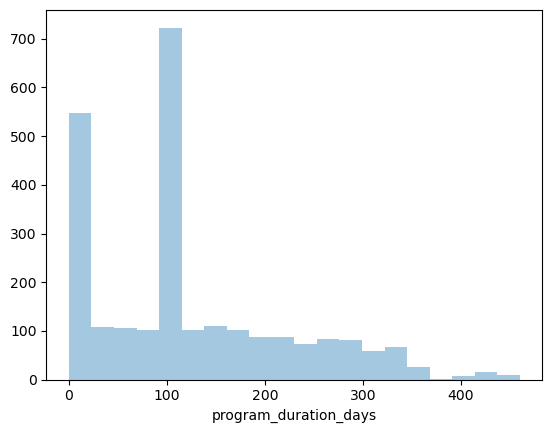

In [6]:
sns.distplot(Preprocessed['program_duration_days'],bins=20,kde=False)

In [7]:
Preprocessed['program_duration_days'].describe()

count    2497.000000
mean      124.096916
std        99.971680
min         0.000000
25%        38.000000
50%       112.000000
75%       177.000000
max       460.000000
Name: program_duration_days, dtype: float64

In [8]:
placed_df = Preprocessed.drop(Preprocessed[Preprocessed['placed'] == 0].index)

Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.



# X and y arrays

In [9]:
X = placed_df.drop(["program_duration_days", "placed"], axis=1)
Y = placed_df["program_duration_days"]

In [10]:
X

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,year
3,4,4,0,0,5,0,3,10,100,2,2,1
22,3,4,4,2,5,0,1,5,4,2,6,1
29,4,3,4,3,1,0,2,0,1,2,2,1
38,4,1,4,1,2,2,3,1,15,2,5,1
53,4,3,4,3,2,1,3,0,30,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2481,4,3,0,1,1,3,3,6,6,2,7,1
2482,1,3,1,3,8,2,7,1,45,2,1,2
2485,4,4,1,3,9,2,3,0,6,1,2,1
2487,1,1,0,0,5,1,3,0,9,2,6,0


In [11]:
Y

3        89
22      193
29       73
38       83
53       76
       ... 
2481     31
2482    277
2485    310
2487     33
2488    119
Name: program_duration_days, Length: 949, dtype: int64

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 101)

# Standardize

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
sc.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled=sc.transform(X_train)

In [18]:
X_train_scaled1 = sc.fit_transform(X_train)

In [19]:
X_train_scaled

array([[ 0.54531574,  0.29073128,  1.20097291, ..., -1.69497307,
         1.12999983,  0.49521887],
       [ 0.54531574, -0.50078115,  0.19307677, ..., -1.69497307,
         0.70782655,  0.49521887],
       [ 0.54531574, -1.29229357, -0.81481938, ...,  0.55839066,
        -0.13652001, -1.14303425],
       ...,
       [ 0.54531574,  0.29073128, -0.81481938, ...,  0.55839066,
        -0.98086656, -1.14303425],
       [-1.66573883,  0.29073128,  1.20097291, ...,  0.55839066,
         0.70782655,  0.49521887],
       [ 0.54531574,  0.29073128, -0.81481938, ...,  0.55839066,
        -0.98086656, -1.14303425]])

In [20]:
X_train_scaled1

array([[ 0.54531574,  0.29073128,  1.20097291, ..., -1.69497307,
         1.12999983,  0.49521887],
       [ 0.54531574, -0.50078115,  0.19307677, ..., -1.69497307,
         0.70782655,  0.49521887],
       [ 0.54531574, -1.29229357, -0.81481938, ...,  0.55839066,
        -0.13652001, -1.14303425],
       ...,
       [ 0.54531574,  0.29073128, -0.81481938, ...,  0.55839066,
        -0.98086656, -1.14303425],
       [-1.66573883,  0.29073128,  1.20097291, ...,  0.55839066,
         0.70782655,  0.49521887],
       [ 0.54531574,  0.29073128, -0.81481938, ...,  0.55839066,
        -0.98086656, -1.14303425]])

In [21]:
col=X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col)
X_train_scaled

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,year
0,0.545316,0.290731,1.200973,1.010796,-0.656777,-1.055174,1.122357,-0.386946,-0.826288,-1.694973,1.130000,0.495219
1,0.545316,-0.500781,0.193077,1.010796,1.681810,1.418978,1.122357,-0.021818,0.517404,-1.694973,0.707827,0.495219
2,0.545316,-1.292294,-0.814819,-0.432474,1.681810,-0.230457,-0.755941,-0.752075,0.517404,0.558391,-0.136520,-1.143034
3,0.545316,0.290731,1.200973,-1.154109,1.681810,1.418978,-0.755941,-0.386946,-0.042468,0.558391,-0.558693,-1.143034
4,0.545316,-1.292294,-0.814819,1.010796,0.746375,-0.230457,3.000656,1.438695,-0.691919,0.558391,-0.980867,0.495219
...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.665739,0.290731,-0.814819,1.010796,-0.189060,-1.055174,-0.755941,-0.386946,-0.154442,0.558391,-0.558693,0.495219
565,0.545316,1.082244,-0.814819,1.732432,0.278658,-1.055174,-0.755941,-0.752075,-0.266416,0.558391,-1.825213,-1.143034
566,0.545316,0.290731,-0.814819,-1.154109,0.278658,1.418978,0.496258,-0.752075,0.069507,0.558391,-0.980867,-1.143034
567,-1.665739,0.290731,1.200973,0.289161,-0.189060,1.418978,-0.755941,-0.021818,2.085046,0.558391,0.707827,0.495219


In [22]:
X_test

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,year
2308,4,2,4,3,6,1,1,2,15,2,7,1
255,4,3,0,1,5,0,3,2,60,1,7,0
2058,0,3,0,0,2,0,3,1,30,2,3,0
263,4,2,5,3,2,0,1,3,3,2,7,0
294,4,4,4,0,5,0,4,1,50,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1930,4,4,4,3,7,3,1,0,30,2,2,0
1294,4,4,0,2,4,0,2,1,25,1,2,1
732,4,3,4,3,6,3,3,0,100,2,7,0
587,4,1,0,0,3,2,1,0,8,2,8,1


In [23]:
X_test_scaled=sc.transform(X_test)

In [24]:
col=X.columns
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col)
X_test_scaled

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,year
0,0.545316,-0.500781,1.200973,1.010796,0.746375,-0.230457,-0.755941,-0.021818,-0.490365,0.558391,1.130000,0.495219
1,0.545316,0.290731,-0.814819,-0.432474,0.278658,-1.055174,0.496258,-0.021818,0.517404,-1.694973,1.130000,-1.143034
2,-2.402757,0.290731,-0.814819,-1.154109,-1.124494,-1.055174,0.496258,-0.386946,-0.154442,0.558391,-0.558693,-1.143034
3,0.545316,-0.500781,1.704921,1.010796,-1.124494,-1.055174,-0.755941,0.343310,-0.759104,0.558391,1.130000,-1.143034
4,0.545316,1.082244,1.200973,-1.154109,0.278658,-1.055174,1.122357,-0.386946,0.293456,0.558391,-0.980867,-1.143034
...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.545316,1.082244,1.200973,1.010796,1.214092,1.418978,-0.755941,-0.752075,-0.154442,0.558391,-0.980867,-1.143034
376,0.545316,1.082244,-0.814819,0.289161,-0.189060,-1.055174,-0.129841,-0.386946,-0.266416,-1.694973,-0.980867,0.495219
377,0.545316,0.290731,1.200973,1.010796,0.746375,1.418978,0.496258,-0.752075,1.413200,0.558391,1.130000,-1.143034
378,0.545316,-1.292294,-0.814819,-1.154109,-0.656777,0.594260,-0.755941,-0.752075,-0.647129,0.558391,1.552173,0.495219


In [25]:
X_train= X_train_scaled
X_test= X_test_scaled

# Creating and Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,Y_train)

LinearRegression()

# Find Model Coefficients

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [29]:
## print the intercept(b0)
print(lm.intercept_)

157.8804920913884


In [30]:
# print the coefficients(b1, b2, ...)
print(lm.coef_)

[-4.60848184 -1.51585148 -0.98008037  3.53724616 -2.41905491 -7.89197488
 -2.25832424 -6.64566639 -3.34418147 -0.99851359  1.670474   -4.02853733]


# Prediction

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions

array([161.36524007, 167.32768693, 181.35789264, 176.97766806,
       157.58498166, 163.04556426, 161.7572236 , 156.79558942,
       177.69248572, 157.53118142, 183.16927892, 167.81234132,
       158.43832054, 170.91476427, 159.39137829, 148.81592419,
       155.53826718, 169.696831  , 146.65594476, 145.50850327,
       171.98552293, 173.40313195, 143.08103637, 156.65831551,
       142.189323  , 163.4945234 , 167.08275889, 168.65595076,
       165.13146324, 166.16105717, 176.89854351, 151.89487501,
       154.35127068, 135.21204641, 159.17414073, 164.83884879,
       162.63241108, 147.57298348, 173.560668  , 158.51045027,
       131.6799254 , 161.15038565, 153.77166371, 153.08856592,
       150.69770998, 165.68447325, 149.99448089, 163.34385623,
       175.24859596, 133.99231601, 114.98324901, 172.72875393,
       160.40939096, 140.66817455, 151.14077155, 144.87780095,
       155.89176295, 161.30406642, 173.13220521, 158.11034276,
       151.50081737, 152.48626723, 171.904369  , 158.01

# Compare Test and Prediction


<AxesSubplot:xlabel='program_duration_days'>

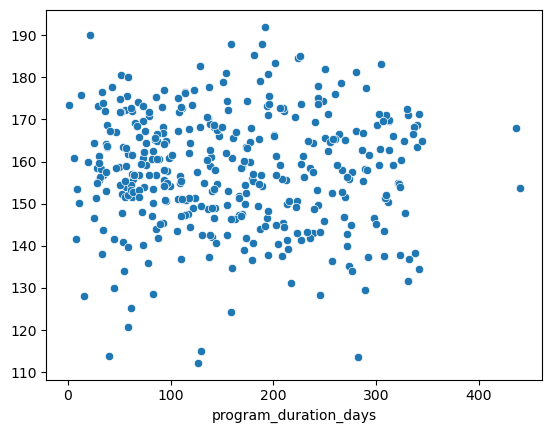

In [33]:
sns.scatterplot(x=Y_test, y=predictions)

# Residual Histogram

In [34]:
residual= Y_test-predictions

C:\Users\Pejvak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


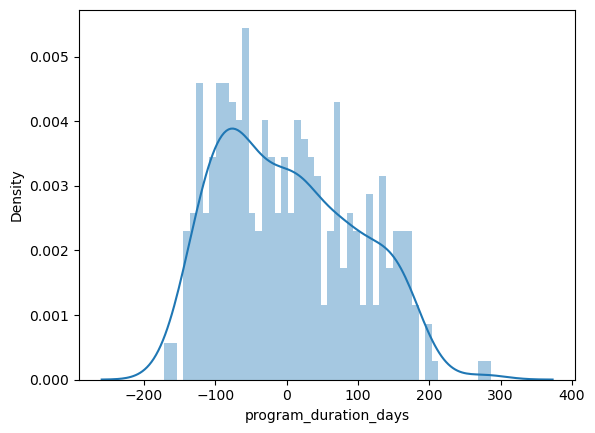

In [35]:
sns.distplot(residual,bins=50);

# Regression Evaluation Metrics


In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 80.20677708541868
MSE: 8991.26461442707
RMSE: 94.82227910373737
